<a href="https://colab.research.google.com/github/ArtNellas/Colabs/blob/main/Copy_of_AI_Palm_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Master Run

##Preliminaries and Loading the Dataset

In [ ]:
#Import necessary functions and methods

import os
import re
import PIL
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
#Loading the Dataset
#Source:https://www.kaggle.com/datasets/kumar99411/palm-data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI Finals/Usable Datasets/palm_ffb.csv')
display(df)

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
...,...,...,...,...,...,...,...,...,...
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91


<Axes: xlabel='HA_Harvested', ylabel='FFB_Yield'>

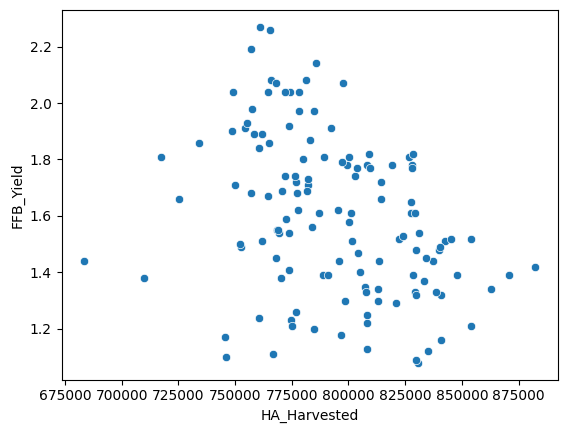

In [ ]:
sns.scatterplot(data=df, x='HA_Harvested', y='FFB_Yield')

##Preprocessing

In [ ]:
#Separating 'Date' column for easier use
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop('Date', axis=1)

In [ ]:
display(df)

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,Year,Month,Day
0,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62,2008,1,1
1,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45,2008,1,2
2,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56,2008,1,3
3,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39,2008,1,4
4,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44,2008,1,5
...,...,...,...,...,...,...,...,...,...,...,...
125,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29,2018,1,6
126,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42,2018,1,7
127,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61,2018,1,8
128,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91,2018,1,9


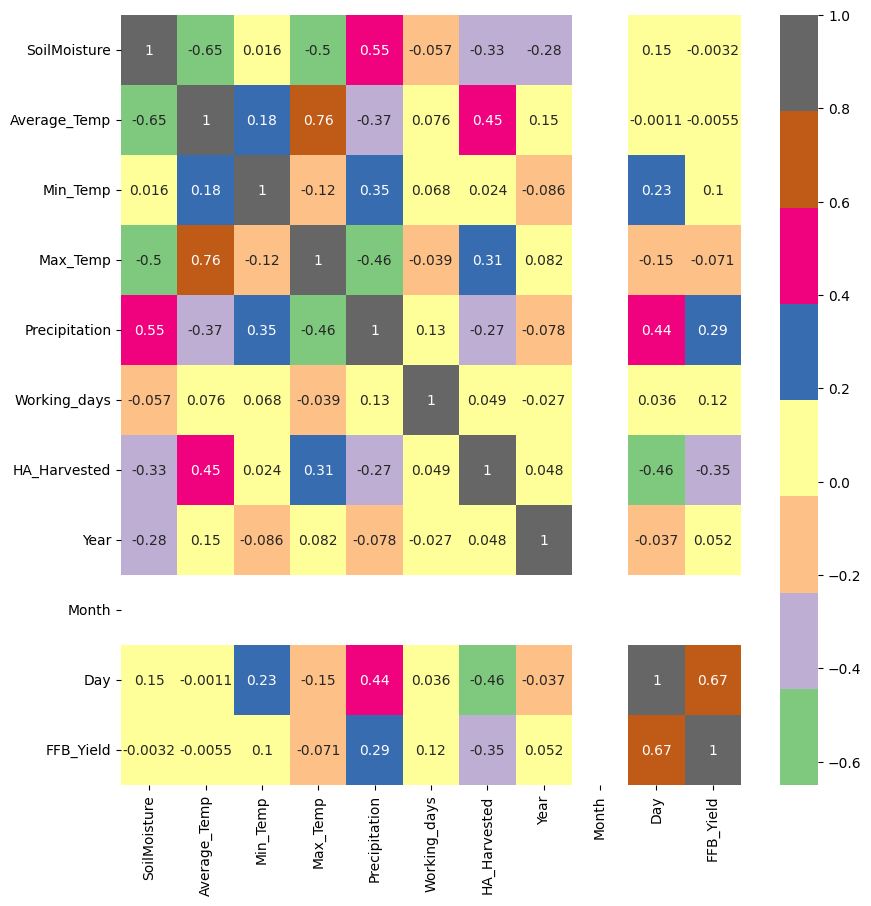

In [ ]:
#Checking for any highly correlated features
corr_matrix = df[['SoilMoisture','Average_Temp',
                  'Min_Temp',	'Max_Temp',	'Precipitation',
                  'Working_days','HA_Harvested',
                  'Year',	'Month','Day', 'FFB_Yield']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True, cmap ='Accent')
plt.show()

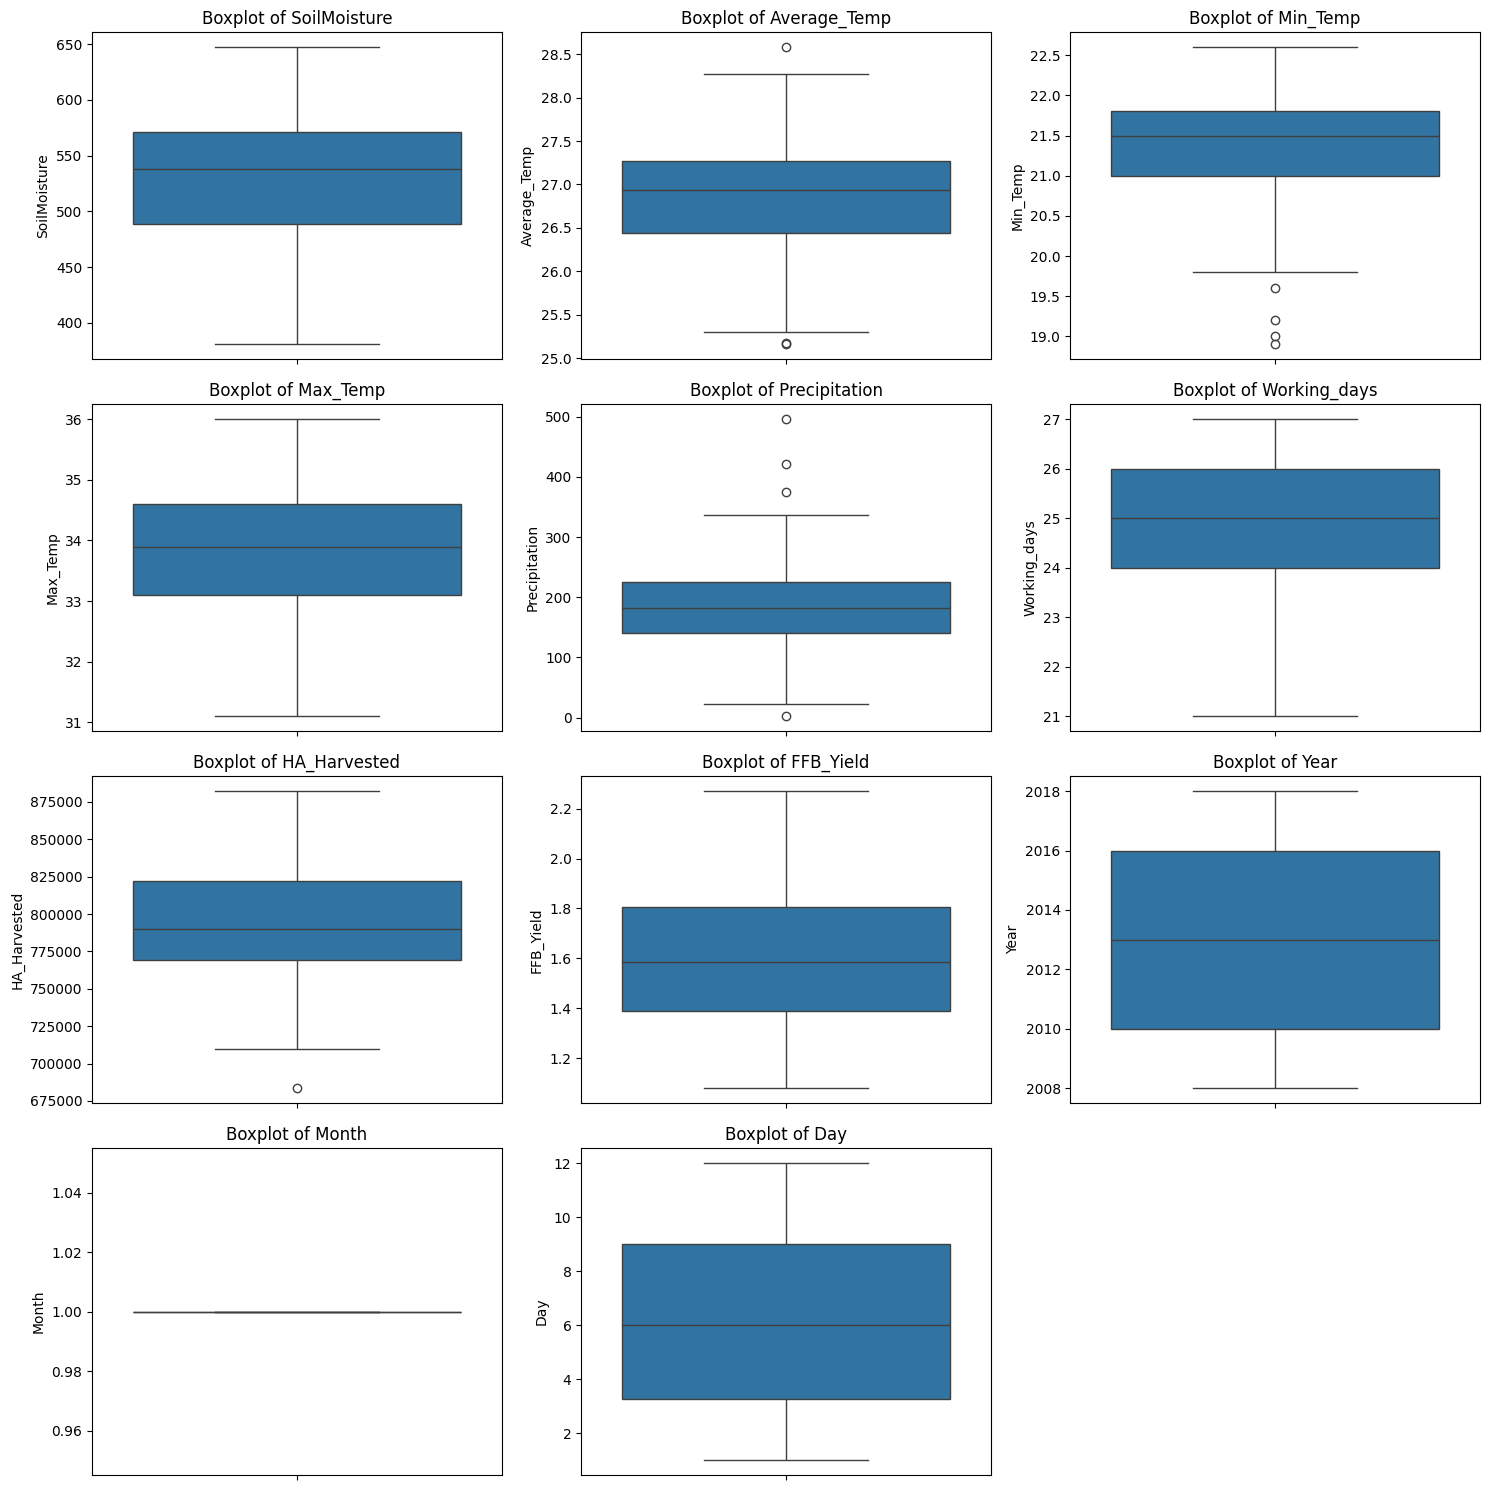

In [ ]:
#Checking for outliers within the numerical columns
numeric_columns = ['SoilMoisture','Average_Temp',
                  'Min_Temp',	'Max_Temp',	'Precipitation',
                  'Working_days','HA_Harvested',	'FFB_Yield',
                  'Year',	'Month','Day']
plt.figure(figsize=(15, 15))
for i, column in enumerate(numeric_columns, 1):
     plt.subplot(4, 3, i)
     sns.boxplot(df[column])
     plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
#Removing outliers within the columns with outliers
df['Average_Temp'] = np.log(df['Average_Temp'] + 1)
df['Min_Temp'] = np.log(df['Min_Temp'] + 1)
df['HA_Harvested'] = np.log(df['HA_Harvested'] + 1)
df['Precipitation'] = np.log(df['Precipitation'] + 1)

In [ ]:
display(df)

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,Year,Month,Day
0,616.4,3.269814,3.104587,32.2,5.222516,25,13.564198,1.62,2008,1,1
1,568.9,3.301948,3.086487,35.1,4.950177,23,13.551531,1.45,2008,1,2
2,577.6,3.275195,3.104587,32.9,5.639777,25,13.572104,1.56,2008,1,3
3,581.1,3.328746,3.072693,34.8,5.160778,25,13.578506,1.39,2008,1,4
4,545.4,3.340808,3.086487,35.0,4.953006,25,13.609299,1.44,2008,1,5
...,...,...,...,...,...,...,...,...,...,...,...
125,498.2,3.339795,3.117950,33.6,5.115596,24,13.617986,1.29,2018,1,6
126,494.7,3.334851,3.100092,33.5,5.047931,26,13.690237,1.42,2018,1,7
127,478.8,3.332780,3.063391,33.6,4.853592,25,13.628566,1.61,2018,1,8
128,481.1,3.330298,3.091042,34.2,5.201806,23,13.582446,1.91,2018,1,9


##Nulls, Dupes, and Other things

In [ ]:
#Checking and Removing duplicates

print(f"Number of duplicates: {np.sum(df.duplicated())}")

df.drop_duplicates(inplace = True)

print(f"Number of duplicates after: {np.sum(df.duplicated())}")

Number of duplicates: 0
Number of duplicates after: 0


In [ ]:
#Checking for Null Values
df.isna().sum()

,0
SoilMoisture,0
Average_Temp,0
Min_Temp,0
Max_Temp,0
Precipitation,0
Working_days,0
HA_Harvested,0
FFB_Yield,0
Year,0
Month,0


In [ ]:
df.dropna()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,Year,Month,Day
0,616.4,3.269814,3.104587,32.2,5.222516,25,13.564198,1.62,2008,1,1
1,568.9,3.301948,3.086487,35.1,4.950177,23,13.551531,1.45,2008,1,2
2,577.6,3.275195,3.104587,32.9,5.639777,25,13.572104,1.56,2008,1,3
3,581.1,3.328746,3.072693,34.8,5.160778,25,13.578506,1.39,2008,1,4
4,545.4,3.340808,3.086487,35.0,4.953006,25,13.609299,1.44,2008,1,5
...,...,...,...,...,...,...,...,...,...,...,...
125,498.2,3.339795,3.117950,33.6,5.115596,24,13.617986,1.29,2018,1,6
126,494.7,3.334851,3.100092,33.5,5.047931,26,13.690237,1.42,2018,1,7
127,478.8,3.332780,3.063391,33.6,4.853592,25,13.628566,1.61,2018,1,8
128,481.1,3.330298,3.091042,34.2,5.201806,23,13.582446,1.91,2018,1,9


In [ ]:
#Scaling all numerical columns
scalerMM = MinMaxScaler()
df[['Year', 'Month', 'Day']] = scalerMM.fit_transform(df[['Year', 'Month', 'Day']])

scalerSS = StandardScaler()
df[['SoilMoisture',
    'Average_Temp',
    'Min_Temp',	'Max_Temp',
    'Precipitation',
    'Working_days',
    'HA_Harvested',
    'FFB_Yield']] = scalerSS.fit_transform(df[['SoilMoisture', 'Average_Temp', 'Min_Temp',	'Max_Temp',	'Precipitation',	'Working_days',	'HA_Harvested',	'FFB_Yield']])

In [ ]:
display(df)

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,Year,Month,Day
0,1.553072,-2.424105,-0.098070,-1.535633,0.164668,0.199393,-0.436614,0.063311,0.0,0.0,0.000000
1,0.721879,-1.051300,-0.677287,1.160844,-0.291680,-1.420678,-0.728437,-0.542394,0.0,0.0,0.090909
2,0.874119,-2.194225,-0.098070,-0.884759,0.863859,0.199393,-0.254477,-0.150467,0.0,0.0,0.181818
3,0.935365,0.093525,-1.118685,0.881898,0.061216,0.199393,-0.106985,-0.756172,0.0,0.0,0.272727
4,0.310658,0.608817,-0.677287,1.067862,-0.286940,0.199393,0.602401,-0.578023,0.0,0.0,0.363636
...,...,...,...,...,...,...,...,...,...,...,...
125,-0.515286,0.565529,0.329565,-0.233885,-0.014494,-0.610642,0.802533,-1.112469,1.0,0.0,0.454545
126,-0.576532,0.354321,-0.241894,-0.326867,-0.127877,1.009429,2.467028,-0.649283,1.0,0.0,0.545455
127,-0.854763,0.265871,-1.416370,-0.233885,-0.453525,0.199393,1.046277,0.027682,1.0,0.0,0.636364
128,-0.814515,0.159819,-0.531497,0.324006,0.129966,-1.420678,-0.016238,1.096572,1.0,0.0,0.727273


##Train-Test Split

In [ ]:
#Identifying the features and target
X = df.drop('FFB_Yield', axis=1)
y = df['FFB_Yield']

In [ ]:
print(X)

     SoilMoisture  Average_Temp  Min_Temp  Max_Temp  Precipitation  \
0        1.553072     -2.424105 -0.098070 -1.535633       0.164668   
1        0.721879     -1.051300 -0.677287  1.160844      -0.291680   
2        0.874119     -2.194225 -0.098070 -0.884759       0.863859   
3        0.935365      0.093525 -1.118685  0.881898       0.061216   
4        0.310658      0.608817 -0.677287  1.067862      -0.286940   
..            ...           ...       ...       ...            ...   
125     -0.515286      0.565529  0.329565 -0.233885      -0.014494   
126     -0.576532      0.354321 -0.241894 -0.326867      -0.127877   
127     -0.854763      0.265871 -1.416370 -0.233885      -0.453525   
128     -0.814515      0.159819 -0.531497  0.324006       0.129966   
129     -0.294801     -0.035243 -0.531497  0.509970       0.357407   

     Working_days  HA_Harvested  Year  Month       Day  
0        0.199393     -0.436614   0.0    0.0  0.000000  
1       -1.420678     -0.728437   0.0    0.0 

In [ ]:
print(X.shape, y.shape)

(130, 10) (130,)


In [ ]:
#Splitting the dataset
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 22)

##Linear Regression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

In [ ]:
#Printing important metrics
print("Mean Squared Error: ", mse)
print("RMSE: ", math.sqrt(mse))
print("R2 Score: ", r2)
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

Mean Squared Error:  0.6246085932204282
RMSE:  0.790321828890249
R2 Score:  0.3613268260762862
Coefficients:  [-0.32146548 -0.30627852 -0.07212845  0.1483088   0.22614764  0.12376548
  0.0105341  -0.09736091  0.          2.06129308]
Intercept:  -0.9678230398844484


<ipython-input-121-97dec632d2f7>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


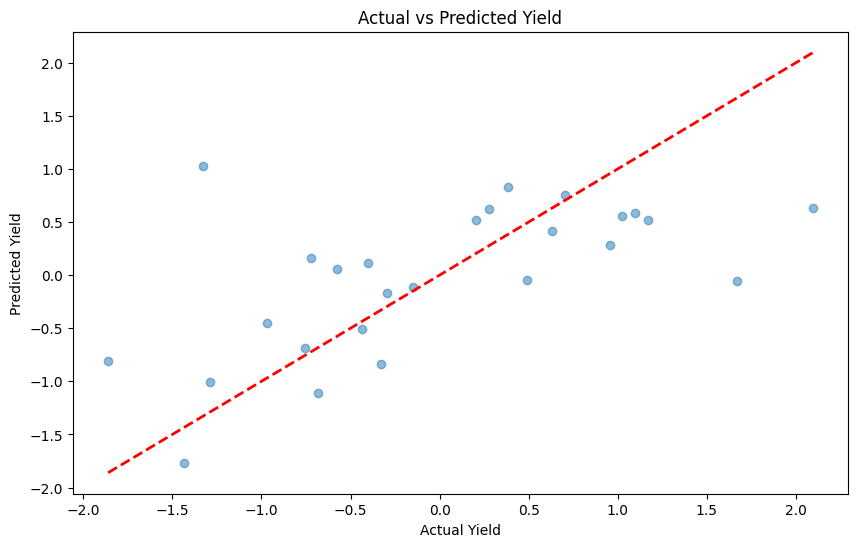

In [ ]:
#Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()

##Cross Validation

In [ ]:
#Checking the Cross-Validation Score
cv_scores_lr = cross_val_score(model, X, y, cv=4, scoring='r2')
print("Linear Regression CV R-squared:", np.mean(cv_scores_lr))

Linear Regression CV R-squared: 0.21641022059335302
